## **Loading the Dataset & Renaming Image Name**

In [ ]:
import os
import pandas as pd

csvClasses = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train\_classes.csv"
imageDataset = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"

# Read the CSV file
df = pd.read_csv(csvClasses, encoding="utf-8")
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespaces in column names

# Dictionary to track counts for each disease-based filename
file_counters = {}

# Iterate through each row of the DataFrame to rename images and update filenames
for index, row in df.iterrows():
    filename = row['filename']

    # Determine the disease(s) based on the columns
    diseases = []
    for column in df.columns[1:]:  # Assuming all columns after 'filename' represent diseases
        if row[column] == 1:
            diseases.append(column.replace(" ", "_"))  # Replace spaces with underscores in disease names

    # Generate the new base filename
    disease_label = "_".join(diseases) if diseases else "Healthy"

    # Ensure uniqueness by adding a counter
    if disease_label not in file_counters:
        file_counters[disease_label] = 1
    else:
        file_counters[disease_label] += 1

    # Construct the unique filename
    unique_filename = f"{disease_label}_{file_counters[disease_label]}{os.path.splitext(filename)[1]}"

    # Paths for renaming
    original_path = os.path.join(imageDataset, filename)
    new_path = os.path.join(imageDataset, unique_filename)

    # Rename the file if it exists
    if os.path.exists(original_path):
        os.rename(original_path, new_path)
        print(f"Renamed: {filename} -> {unique_filename}")

        # Update the 'filename' column in the DataFrame with the new filename
        df.at[index, 'filename'] = unique_filename
    else:
        print(f"File not found: {filename}")

# Save the modified DataFrame with updated filenames back to the CSV
df.to_csv(csvClasses, index=False)

print("CSV file updated with new filenames.")

Renamed: Leaf-Spot045_jpg.rf.abd40eb3886f2e6c7c27c5bf35c2496f.jpg -> Leaf_Spot_1.jpg
Renamed: Leaf-Spot097_jpg.rf.aa96e9025a00f311299c992e70b19a55.jpg -> Leaf_Spot_2.jpg
Renamed: AlgalLeafSpot079_jpg.rf.ab9286aa1ecaafea7089e29a57ed7f82.jpg -> Algal_Leaf_Spot_1.jpg
Renamed: AlgalLeafSpot056_jpg.rf.ae1b3607d225b61e68f7126ed2ce5a36.jpg -> Algal_Leaf_Spot_2.jpg
Renamed: LeafBlight032_jpg.rf.a425194e0bdd60e9babcf8cecdefa1e9.jpg -> Leaf_Blight_1.jpg
Renamed: AlgalLeafSpot021_jpg.rf.b38c03fb6204db0ad2de8cc0ddff1941.jpg -> Algal_Leaf_Spot_3.jpg
Renamed: NoDisease007_jpg.rf.b370b6187b704e2db0291d48810492bc.jpg -> No_Disease_1.jpg
Renamed: NoDisease041_jpg.rf.b2b867f43b580f3c9569c0163abaeebb.jpg -> No_Disease_2.jpg
Renamed: AlgalLeafSpot025_jpg.rf.ae51aa72e53759a58aa0579588407b50.jpg -> Algal_Leaf_Spot_4.jpg
Renamed: Leaf-Spot078_jpg.rf.b05899b647bac156ea14ff83a3a848e0.jpg -> Leaf_Spot_3.jpg
Renamed: NoDisease080_jpg.rf.ade5fd98ed20f937ef1cb60a98632a59.jpg -> No_Disease_3.jpg
Renamed: Leaf-Spot0

## **Removing Noisy Data with Irrelevant Feature**

In [ ]:
import os
import pandas as pd

csvClasses = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train\_classes.csv"
imageDataset = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"

# Reading the CSV files
df = pd.read_csv(csvClasses, encoding="utf-8")
df.columns = df.columns.str.strip()  # Clean column names

# Identify and remove 'Leaf_Spot_No_Disease' images
# Get filenames of the rows with the 'Leaf_Spot_No_Disease' label
to_remove_files = df[df['filename'].str.contains('Leaf_Spot_No_Disease')]['filename'].tolist()

# Remove the data rows of outlier images from the CSV file.
df = df[~df['filename'].str.contains('Leaf_Spot_No_Disease')]

# Save the updated CSV file
df.to_csv(csvClasses, index=False)
print("Updated CSV file saved!")

# Deleting the outlier images from the folder
for filename in to_remove_files:
    file_path = os.path.join(imageDataset, filename)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {filename}")
    else:
        print(f"File not found: {filename}")

Updated CSV file saved!
Deleted: Leaf_Spot_No_Disease_1.jpg
Deleted: Leaf_Spot_No_Disease_2.jpg


In [ ]:
# Check if the images are deleted
image_files = [file for file in os.listdir(imageDataset)
               if file.endswith(('.jpg', '.png', '.jpeg'))]

total_images = len(image_files)

print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 418


## **Splitting Data into Train-Test-Validation sets**

In [ ]:
import os
import shutil
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Define paths
source_dir = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"  # Path to raw dataset
output_dir = r"D:\Suvan's Projects\FYP\Original_Split"  # Where split dataset is stored

# Train-Test-Validation split ratios
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

for split in ["train", "test", "val"]:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

images = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Group images by class (assuming class is extracted from filename)
class_images = defaultdict(list)
for img in images:
    class_name = "_".join(img.split("_")[:-1])  # Extract class from filename
    class_images[class_name].append(img)

print(f"Detected {len(class_images)} classes: {list(class_images.keys())}")  # Debugging

# Split dataset while maintaining class subfolders
for class_name, img_list in class_images.items():
    print(f"Processing class '{class_name}' with {len(img_list)} images.")  # Debugging

    # Split into train, test, and val
    train_images, temp_images = train_test_split(img_list, test_size=(test_ratio + val_ratio), random_state=42)
    test_images, val_images = train_test_split(temp_images, test_size=val_ratio / (test_ratio + val_ratio), random_state=42)

    for split, split_images in zip(["train", "test", "val"], [train_images, test_images, val_images]):
        split_class_dir = os.path.join(output_dir, split, class_name)  # Create class subfolder
        os.makedirs(split_class_dir, exist_ok=True)  # Ensure class subfolder exists

        for image in split_images:
            src_path = os.path.join(source_dir, image)
            dest_path = os.path.join(split_class_dir, image)
            shutil.copy(src_path, dest_path)  # Copy images to respective folders
            print(f"-> Moved {image} to {dest_path}")  # Debugging

print("Dataset successfully split into class subfolders!")

Detected 4 classes: ['Algal_Leaf_Spot', 'Leaf_Blight', 'Leaf_Spot', 'No_Disease']
Processing class 'Algal_Leaf_Spot' with 105 images.
-> Moved Algal_Leaf_Spot_98.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_98.jpg
-> Moved Algal_Leaf_Spot_75.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_75.jpg
-> Moved Algal_Leaf_Spot_3.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_3.jpg
-> Moved Algal_Leaf_Spot_76.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_76.jpg
-> Moved Algal_Leaf_Spot_103.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_103.jpg
-> Moved Algal_Leaf_Spot_60.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_60.jpg
-> Moved Algal_Leaf_Spot_55.jpg to D:\Suvan's Projects\FYP\Original_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_55.jpg
-> Moved Algal_Leaf_Spot_4.jpg to

## **Resizing Images**

[Shape of Resized Images]

Number of images:  418
Height of images:  224
Width of images:  224
Number of RGB Channels:  3


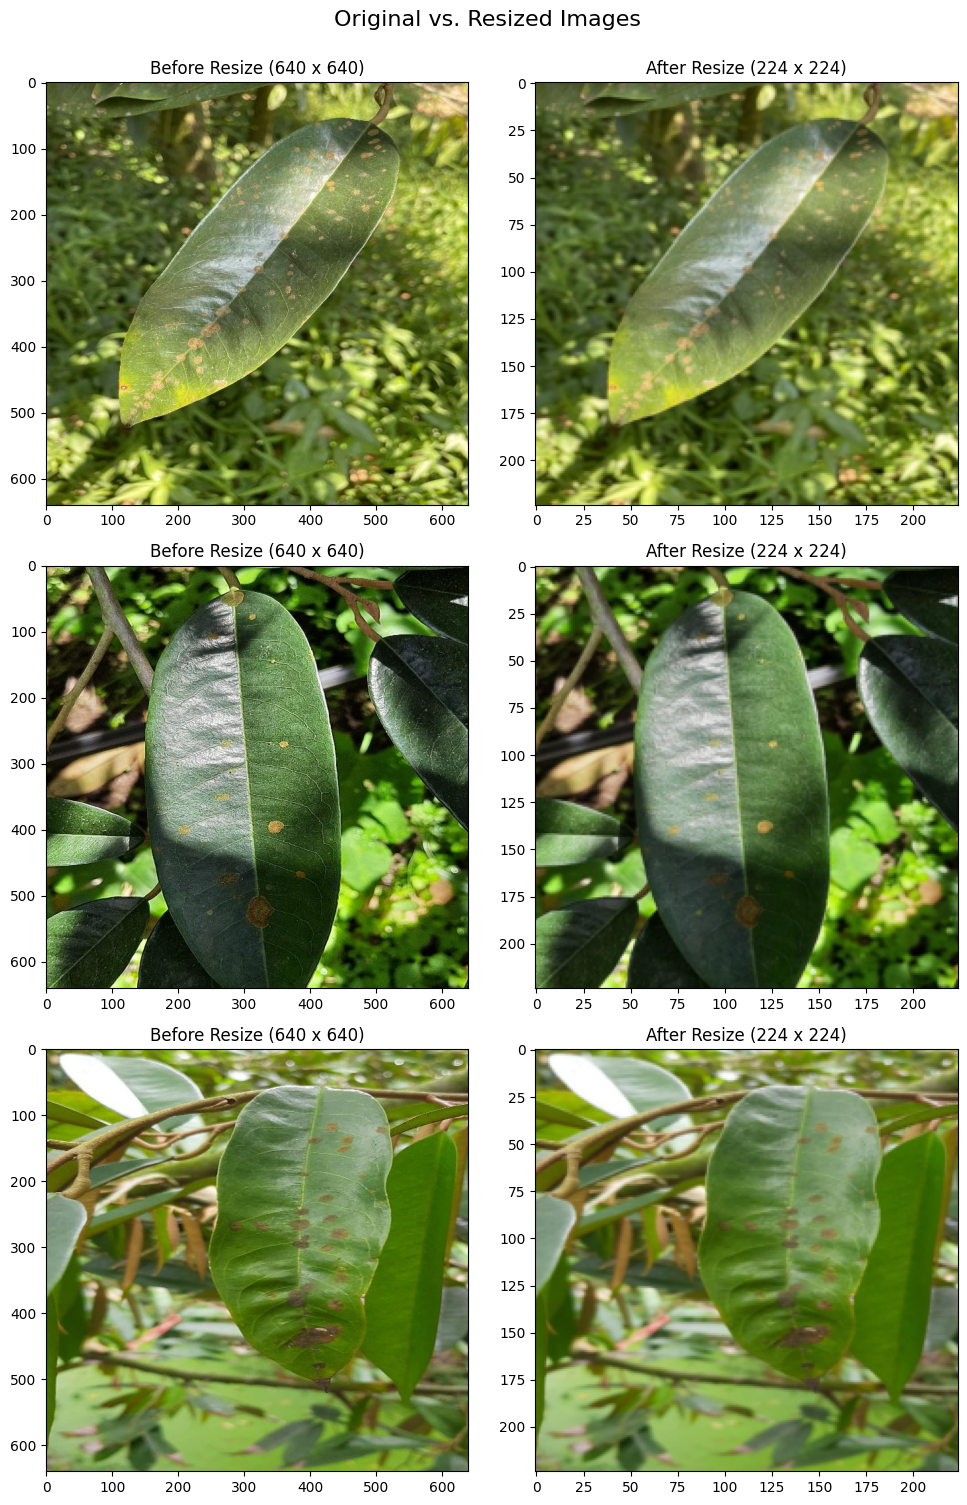

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

image_data = []
imageDataset = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"

for filename in os.listdir(imageDataset):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Filter image files
        file_path = os.path.join(imageDataset, filename)

        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify image integrity
            image_data.append(filename)
        except Exception as e:
            print(f"Corrupted file detected: {filename}")

resized_images = []  # Store resized image arrays
for filename in image_data:  # Iterate over all valid images
    file_path = os.path.join(imageDataset, filename)

    try:
        with Image.open(file_path) as img:
            img_resized = img.resize((224, 224), resample=Image.Resampling.BILINEAR)
            resized_images.append(np.array(img_resized))  # Add resized image to the list
    except Exception as e:
        print(f"Error processing image {filename}: {e}")

# Convert resized images to a numpy array
resizedImg = np.array(resized_images)

# Display the shape of the resized images
print("[Shape of Resized Images]\n")
print("Number of images: ", resizedImg.shape[0])
print("Height of images: ", resizedImg.shape[1])
print("Width of images: ", resizedImg.shape[2])
print("Number of RGB Channels: ", resizedImg.shape[3])

# Visualize a subset of images (first 3 images)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
fig.suptitle("Original vs. Resized Images", fontsize=16, y=1)

for idx, filename in enumerate(image_data[:3]):  # Select only the first 3 images for visualization
    file_path = os.path.join(imageDataset, filename)

    try:
        with Image.open(file_path) as img:
            # Display original image
            axes[idx, 0].imshow(img)
            axes[idx, 0].set_title("Before Resize (640 x 640)")
            axes[idx, 0].axis()

            # Display resized image
            img_resized = resizedImg[idx]
            axes[idx, 1].imshow(img_resized)
            axes[idx, 1].set_title("After Resize (224 x 224)")
            axes[idx, 1].axis()
    except Exception as e:
        print(f"Error visualizing image {filename}: {e}")

# Adjust layout and display
plt.tight_layout()
plt.show()

## **Data Augmentation**

In [ ]:
!pip install albumentations

  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/97/d3/cf3aab593209d1be5e4bca54aeea297225708bd25f06426d6b8ec3630a76/albumentations-2.0.5-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
     ---------------------------------------- 41.7/41.7 kB 2.1 MB/s eta 0:00:00
  Obtaining dependency information for pydantic>=2.9.2 from https://files.pythonhosted.org/packages/f4/3c/8cc1cc84deffa6e25d2d0c688ebb80635dfdbf1dbea3e30c541c8cf4d860/pydantic-2.10.6-py3-none-any.whl.metadata
  Obtaining dependency information for albucore==0.0.23 from https://files.pythonhosted.org/packages/3d/de/4d9298befa6ae0f21230378f55100dca364816e3734028ca2766f2eca263/albucore-0.0.23-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless>=4.9.0.80 from https://files.pythonhosted.org/packages/86/8a/69176a64335aed183529207ba8bc3d329c2999d852b4f3818027203f50e6/opencv_python_headless-4.11.0.86


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **Augmenting Training Data**

In [ ]:
import os
import numpy as np
import albumentations as A
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Define paths
train_dir = r"D:\Suvan's Projects\FYP\EditAugment\train"

# Define augmentations
augmentations = [
    A.PlanckianJitter(mode='cied', p=1, sampling_method='gaussian', temperature_limit=(4000, 15000)),
    A.CLAHE(clip_limit=2, tile_grid_size=(8, 8), p=1),
    A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=20, val_shift_limit=15, p=1),
    A.MotionBlur(blur_limit=7, angle_range=(0, 5), direction_range=(0, 0), p=1),
    A.Sharpen(p=1, alpha=(0.3, 0.7), lightness=(0.5, 1), method='kernel')
]

# Store augmentation details for visualization
applied_augmentations = {}

# Choose an image to visualize later
highlight_index = random.randint(0, 50)  # Pick a random index
highlight_image_name = None

# Augment images
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for i, img_name in enumerate(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith((".jpg", ".png", ".jpeg")):
            continue

        try:
            # Load image using PIL (more robust than OpenCV)
            image = Image.open(img_path).convert("RGB")
            image = np.array(image)

            # Store original filename for visualization
            if i == highlight_index:
                highlight_image_name = img_name

            # Ensure unique augmentations
            used_augmentations = set()
            applied_augmentations[img_name] = []

            for aug_num in range(4):
                while True:
                    aug = random.choice(augmentations)
                    if aug not in used_augmentations:
                        used_augmentations.add(aug)
                        break

                # Apply augmentation
                augmented = aug(image=image)["image"]

                # Save augmented image
                aug_filename = f"{os.path.splitext(img_name)[0]}_aug{aug_num + 1}.jpg"
                aug_img_path = os.path.join(class_path, aug_filename)
                Image.fromarray(augmented).save(aug_img_path)

                # Store applied augmentations for plotting
                applied_augmentations[img_name].append(f"{aug.__class__.__name__}")

        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            continue  # Skip this image

print("<< Augmentation complete! >>")

<< Augmentation complete! >>


#### **Creating a Stress Test Dataset**

In [ ]:
import os
import numpy as np
import albumentations as A
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Define input and output paths
train_dir = r"D:\Suvan's Projects\FYP\EditAugment\test"
output_dir = r"D:\Suvan's Projects\FYP\EditAugment\stressTest"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

augmentations = [
    A.PlanckianJitter(mode='cied', p=1, sampling_method='gaussian', temperature_limit=(4000, 15000)),
    A.CLAHE(clip_limit=2, tile_grid_size=(8, 8), p=1),
    A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=20, val_shift_limit=15, p=1),
    A.MotionBlur(blur_limit=7, angle_range=(0, 5), direction_range=(0, 0), p=1),
    A.Sharpen(p=1, alpha=(0.3, 0.7), lightness=(0.5, 1), method='kernel')
]

# Store augmentation details for visualization
applied_augmentations = {}

# Choose an image to visualize later
highlight_index = random.randint(0, 50)  # Pick a random index
highlight_image_name = None

# Augment images
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Create corresponding output directory
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    for i, img_name in enumerate(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith((".jpg", ".png", ".jpeg")):
            continue

        try:
            # Load image using PIL (more robust than OpenCV)
            image = Image.open(img_path).convert("RGB")
            image = np.array(image)

            # Store original filename for visualization
            if i == highlight_index:
                highlight_image_name = img_name

            # Ensure unique augmentations
            used_augmentations = set()
            applied_augmentations[img_name] = []

            for aug_num in range(4):
                while True:
                    aug = random.choice(augmentations)
                    if aug not in used_augmentations:
                        used_augmentations.add(aug)
                        break

                # Apply augmentation
                augmented = aug(image=image)["image"]

                # Save augmented image in the output folder
                aug_filename = f"{os.path.splitext(img_name)[0]}_aug{aug_num + 1}.jpg"
                aug_img_path = os.path.join(class_output_path, aug_filename)
                Image.fromarray(augmented).save(aug_img_path)

                # Store applied augmentations for tracking
                applied_augmentations[img_name].append(f"{aug.__class__.__name__}")

        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            continue  # Skip this image

print("<< Augmentation complete! Images saved in:", output_dir, ">>")

<< Augmentation complete! Images saved in: D:\Suvan's Projects\FYP\EditAugment\stressTest >>


## **Drawing Bounding Boxes on Leaves**

In [ ]:
import pandas as pd

# Load CSV file
csv_path = r"C:\Users\USER\Downloads\BBox_Durian.csv" # Update with actual path
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,Leaf,99,45,444,485,Algal_Leaf_Spot_1.jpg,640,640
1,Leaf,133,26,335,614,Algal_Leaf_Spot_10.jpg,640,640
2,Leaf,241,36,293,491,Algal_Leaf_Spot_100.jpg,640,640
3,Leaf,202,29,298,609,Algal_Leaf_Spot_101.jpg,640,640
4,Leaf,161,11,374,629,Algal_Leaf_Spot_102.jpg,640,640


### Plotting the Distribution of Bounding Box Dimensions

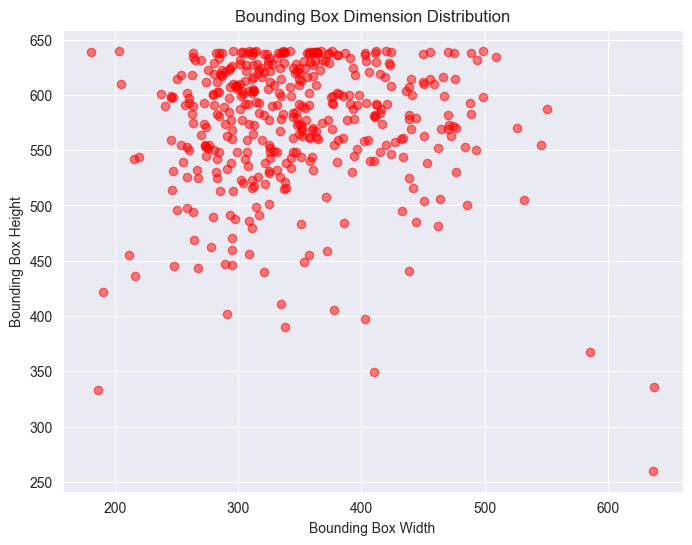

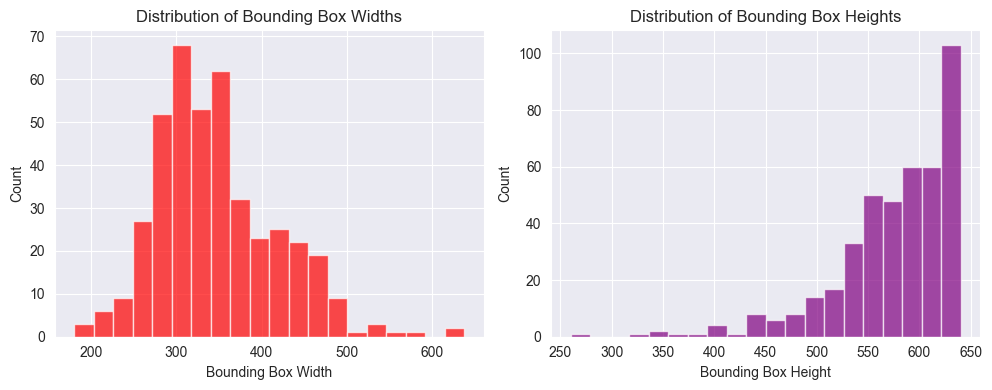

In [ ]:
# Extract bounding box widths and heights
bbox_widths = df["bbox_width"]
bbox_heights = df["bbox_height"]

# Scatter plot of bounding box dimensions
plt.figure(figsize=(8, 6))
plt.scatter(bbox_widths, bbox_heights, alpha=0.5, color="red")
plt.xlabel("Bounding Box Width")
plt.ylabel("Bounding Box Height")
plt.title("Bounding Box Dimension Distribution")
plt.grid(True)
plt.show()

# Histograms of bounding box widths and heights
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(bbox_widths, bins=20, color="red", alpha=0.7)
plt.xlabel("Bounding Box Width")
plt.ylabel("Count")
plt.title("Distribution of Bounding Box Widths")

plt.subplot(1, 2, 2)
plt.hist(bbox_heights, bins=20, color="purple", alpha=0.7)
plt.xlabel("Bounding Box Height")
plt.ylabel("Count")
plt.title("Distribution of Bounding Box Heights")

plt.tight_layout()
plt.show()


### Displaying the Bounding Box

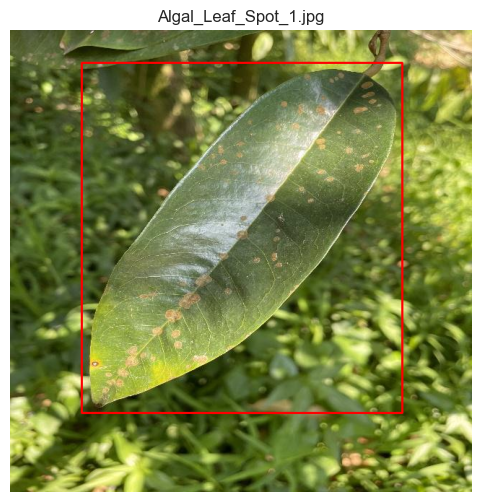

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def draw_bounding_box(image_folder, image_name, x, y, width, height):
    image_path = os.path.join(image_folder, image_name)

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Compute bottom-right coordinates
    x_max, y_max = x + width, y + height

    # Draw the bounding box
    cv2.rectangle(img, (x, y), (x_max, y_max), (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_name)
    plt.show()

image_folder = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"
first_row = df.iloc[0]
draw_bounding_box(image_folder, first_row["image_name"], first_row["bbox_x"], first_row["bbox_y"], first_row["bbox_width"], first_row["bbox_height"])


### Cropping the Region of Interest (ROI)

In [ ]:
import cv2
import numpy as np
import os

def mask_outside_bbox(image_folder, save_folder, image_name, x, y, width, height):
    image_path = os.path.join(image_folder, image_name)

    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load {image_path}")
        return

    # Create a blank mask (black background)
    mask = np.zeros_like(img, dtype=np.uint8)

    # Copy only the bounding box area
    mask[y:y+height, x:x+width] = img[y:y+height, x:x+width]

    # Save the masked image
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, image_name)
    cv2.imwrite(save_path, mask)
    print(f"Saved masked image: {save_path}")

# Example usage
image_folder = r"D:\Suvan's Projects\FYP\Durian Diseases.v1-420-origi.multiclass\train"
save_folder = r"D:\Suvan's Projects\FYP\Masked_Images"
for _, row in df.iterrows():
    mask_outside_bbox(image_folder, save_folder, row["image_name"], row["bbox_x"], row["bbox_y"], row["bbox_width"], row["bbox_height"])


Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_1.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_10.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_100.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_101.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_102.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_103.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_104.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_105.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_11.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_12.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_13.jpg
Saved masked image: D:\Suvan's Projects\FYP\Masked_Images\Algal_Leaf_Spot_14.jpg
Saved masked image: D:\

### Splitting Cropped Images into Train/Test/Val Sets

In [ ]:
import os
import shutil
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Define paths
source_dir = r"D:\Suvan's Projects\FYP\Masked_Images"  # Path to raw dataset
output_dir = r"D:\Suvan's Projects\FYP\Masked_Split"  # Where split dataset is stored

# Train-Test-Validation split ratios
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

for split in ["train", "test", "val"]:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

images = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Group images by class (assuming class is extracted from filename)
class_images = defaultdict(list)
for img in images:
    class_name = "_".join(img.split("_")[:-1])  # Extract class from filename
    class_images[class_name].append(img)

print(f"Detected {len(class_images)} classes: {list(class_images.keys())}")  # Debugging

# Split dataset while maintaining class subfolders
for class_name, img_list in class_images.items():
    print(f"Processing class '{class_name}' with {len(img_list)} images.")  # Debugging

    # Split into train, test, and val
    train_images, temp_images = train_test_split(img_list, test_size=(test_ratio + val_ratio), random_state=42)
    test_images, val_images = train_test_split(temp_images, test_size=val_ratio / (test_ratio + val_ratio), random_state=42)

    for split, split_images in zip(["train", "test", "val"], [train_images, test_images, val_images]):
        split_class_dir = os.path.join(output_dir, split, class_name)  # Create class subfolder
        os.makedirs(split_class_dir, exist_ok=True)  # Ensure class subfolder exists

        for image in split_images:
            src_path = os.path.join(source_dir, image)
            dest_path = os.path.join(split_class_dir, image)
            shutil.copy(src_path, dest_path)  # Copy images to respective folders
            print(f"-> Moved {image} to {dest_path}")  # Debugging

print("Dataset successfully split into class subfolders!")

Detected 4 classes: ['Algal_Leaf_Spot', 'Leaf_Blight', 'Leaf_Spot', 'No_Disease']
Processing class 'Algal_Leaf_Spot' with 105 images.
-> Moved Algal_Leaf_Spot_98.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_98.jpg
-> Moved Algal_Leaf_Spot_75.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_75.jpg
-> Moved Algal_Leaf_Spot_3.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_3.jpg
-> Moved Algal_Leaf_Spot_76.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_76.jpg
-> Moved Algal_Leaf_Spot_103.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_103.jpg
-> Moved Algal_Leaf_Spot_60.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_60.jpg
-> Moved Algal_Leaf_Spot_55.jpg to D:\Suvan's Projects\FYP\Masked_Split\train\Algal_Leaf_Spot\Algal_Leaf_Spot_55.jpg
-> Moved Algal_Leaf_Spot_4.jpg to D:\Suvan's Pr